# <center>**MDI 721- TP3 : Sélection de variables**

## **Contexte** 

<p style="text-align: justify"> <br>
Nous travaillons sur la base de données diabetes de python. La base initiale comporte
n = 442 patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à
l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en
y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti
notre jeu de données, il a volontairement mélangé les variables entre elle de façon aléatoire. Bien
entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous
ne connaissons pas les variables pertinentes. La nouvelle base de données comporte n = 442
patients et p = 210 covariables, notés X. </br>
<p> <b>Objectif : </b> Sélectionner les variables les plus pertinentes grâce aux outils statistiques comme le LASSO, le forward etc... </p>

In [194]:
#importation des librairies usuelles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
#importation des modules de sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [196]:
#importation des données
df:pd.DataFrame = pd.read_csv("data_dm3.csv",header= None)

## **Q.1 : Description du DataFrame**

In [197]:
print(" : ".join(["Nombre d'observations",str(df.shape[0]),]))
print(" : ".join(["Nombre de variables",str(df.shape[1]-1),]))

Nombre d'observations : 442
Nombre de variables : 210


## **Q.2 : Description du DataFrame**

In [198]:
df.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,...,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,152.133
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,77.093
min,-3.149,-2.863,-3.058,-2.857,-3.102,-2.782,-2.825,-3.627,-2.834,-2.696,...,-3.059,-3.207,-2.585,-3.562,-3.168,-2.751,-3.029,-2.675,-2.918,25.000
25%,-0.671,-0.713,-0.716,-0.672,-0.673,-0.695,-0.699,-0.639,-0.667,-0.693,...,-0.689,-0.579,-0.628,-0.619,-0.736,-0.637,-0.647,-0.703,-0.638,87.000
50%,0.038,0.062,0.047,0.000,-0.006,-0.013,-0.048,0.040,0.001,0.036,...,-0.030,0.025,-0.022,-0.006,0.008,-0.003,0.024,-0.042,-0.081,140.500
75%,0.675,0.624,0.698,0.688,0.703,0.716,0.720,0.579,0.630,0.663,...,0.667,0.668,0.599,0.741,0.700,0.644,0.631,0.693,0.725,211.500
max,2.547,2.567,2.966,3.058,3.174,3.138,3.199,3.617,3.099,3.033,...,2.677,2.807,3.255,2.812,2.839,3.351,2.734,3.638,2.710,346.000


In [199]:
print("Somme des moyennes des variables explicatives :", abs(df[range(210)].describe().loc["mean"].sum().round()))
print("Somme des moyennes des variables explicatives :", abs(df[range(210)].describe().loc["std"].sum().round()))

Somme des moyennes des variables explicatives : 0.0
Somme des moyennes des variables explicatives : 210.0


$$\sum_{i=0}^{p=209} mean_{(i)} = 0$$ 

$$\sum_{i=0}^{p=209} \frac{std_i}{p-i+1} = 1$$ 

<b>Les variables explicatives sont donc centrées et normées.</b>

In [200]:
df[210].describe().loc["mean"]

152.13348416289594

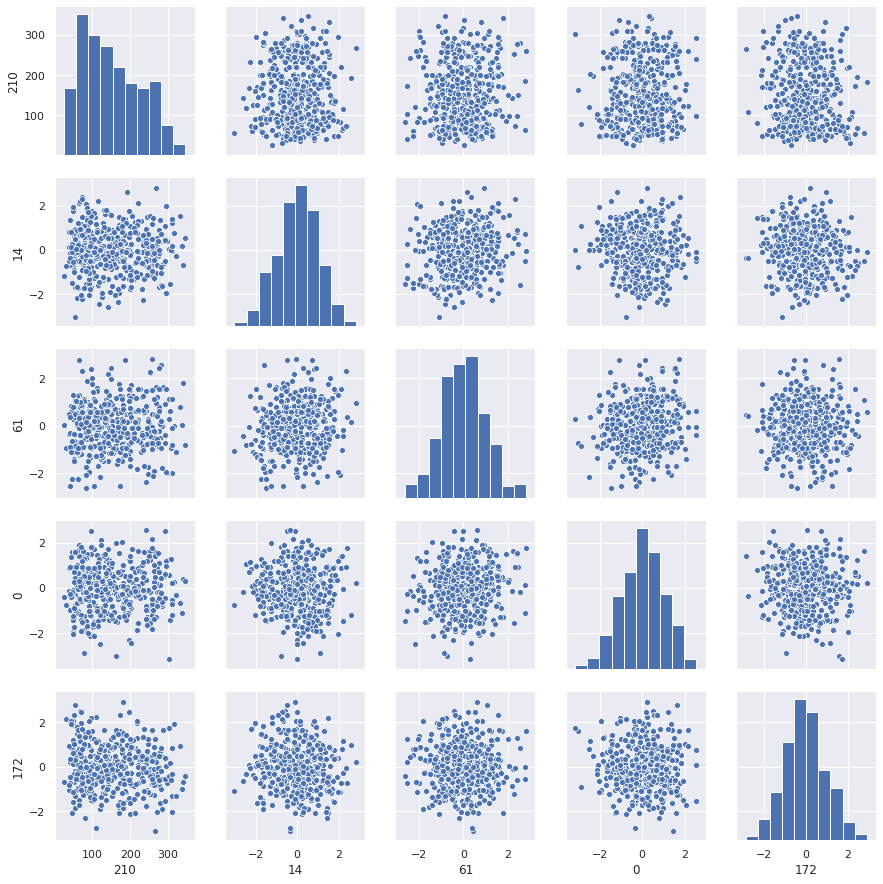

In [201]:
#ajouter titres
sns.pairplot(data=df[np.append(210,(np.random.randint(0,210,4)))])

Nous avons ici sélectionné 4 variables pseudo-aléatoirement ainsi que la variable à expliquer. </br>
Nous avons ensuite tracé chaque variable en fonction des autres pour observer leur variations jointes </br>
On peut ici faire deux observations :
<ol>
    <li>Il ne semble pas y avoir de relation entre les variables sélectionnées. On peut donc en conclure qu'il s'agit des variables du robot farceur que nous nomerons <b>JeanJass </b>.</li>
        <li> Les variables de JeanJass semblent être distribuées selon une loi normale.</li>
</ol>

In [202]:
print(" : ".join(["Moyenne de y",str(df[210].describe().loc["mean"])]))
print(" : ".join(["Ecart type de y",str(df[210].describe().loc["mean"])]))

Moyenne de y : 152.13348416289594
Ecart type de y : 152.13348416289594


https://seaborn.pydata.org/examples/many_pairwise_correlations.html

## **Q.3 : Constitution des échantillons d'entraînement et de test**

In [203]:
X_train, X_test, y_train, y_test = train_test_split(df[range(0,210)], df[210], test_size=0.20, random_state=42)

In [204]:
print("\n","Nombre d'observations de X_train : ",X_train.shape[0], "soit",str(round(353/442*100))+" %", " du DataFrame.","\n","Nombre d'observations de X_test" ,X_test.shape[0],"soit",str(round(89/442*100))+" %", " du DataFrame.")


 Nombre d'observations de X_train :  353 soit 80 %  du DataFrame. 
 Nombre d'observations de X_test 89 soit 20 %  du DataFrame.


<b>L'échantillon ayant été partillonné, les valeurs ne sont donc plus centrées.</b>

## **Q.4 : Matrice de covariance de X_train et valeurs propres associées**

In [205]:
X_train_scaled:pd.DataFrame = pd.DataFrame(data=scale(X_train, axis=0, with_mean=True, with_std=False))

On définit $X\_train\_cov $ la matrice de covariance du DataFrame $X\_train$.

In [206]:
X_train_cov:pd.DataFrame = X_train_scaled.cov()

In [207]:
ipca = PCA(n_components=209)
model_PCA =  ipca.fit(X_train_cov)
#ratio_variance = model_PCA.explained_variance_ratio_ 
eighenvalues = model_PCA.singular_values_

Text(0.5, 1.0, 'Décroissance des valeurs propres de la matrice de covariance')

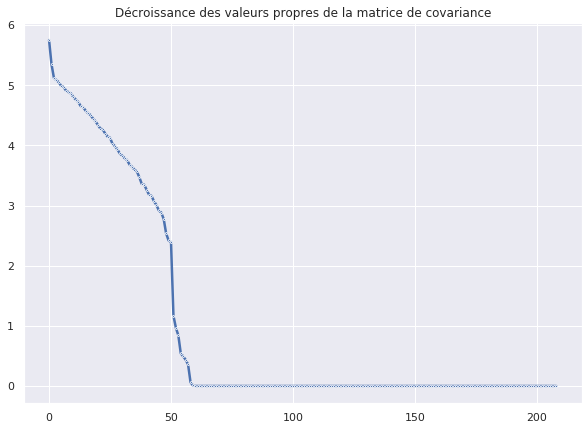

In [208]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=eighenvalues,marker="o",markersize=2, linewidth=2.5)
plt.title("Décroissance des valeurs propres de la matrice de covariance")

On remarque qu'aux alentours de la 60ème valeurs propres, toutes les valeurs propres ont une valeur proche de zéro. </br>
On peut donc dire que l'ensemble des variables explicatives correspondantes ne sont pas des variables explicatives pour notre problème. On peut donc ne pas les prendre en compte.


## **Q.5 : Comparaison des méthodes MCO classique et APC avant le MCO**

### Q.5.1. Méthode des MCO classique

In [216]:
mco = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

#reg.score(Xtild2, y_train)
print("intercept sans ALS : " + str(mco.intercept_) )
predictions_mco = mco.predict(X_test)
coefs_mco = np.sort(mco.coef_)

intercept sans ALS : 152.98654390934846


Text(0.5, 1.0, 'Coeffcients ordonnés issus de la régression linéaire simple ')

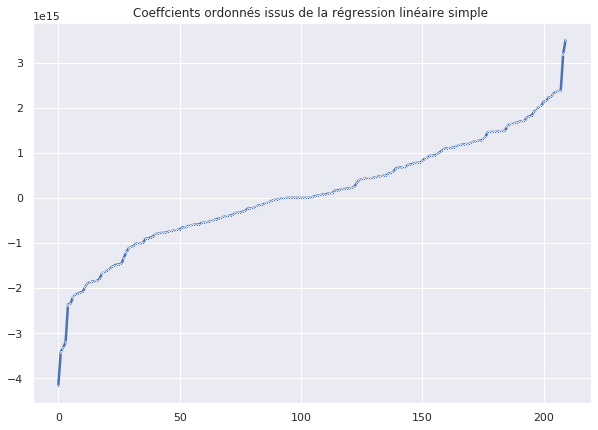

In [247]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=coefs_mco, marker='o',markersize=2, linewidth=2.5)
plt.title("Coeffcients ordonnés issus de la régression linéaire simple ")

## 5.2. Méthode APC avant MCO

On définit $\tilde{X} = {X\_train}\times{V_{(1:60)}} $ correspondant à la matrix $X\_train$ exprimée dans la base des vecteurs des 60 premières valeurs propres.

In [234]:
Xtild = PCA(n_components=60).fit_transform(X_train)
print("Taille de la matrice Xtilde :", Xtild.shape)

Taille de la matrice Xtilde : (353, 60)


In [240]:
Xtild_test = PCA(n_components=60).fit(X_train).transform(X_test)
print("Taille de la matrice Xtilde_test :", Xtild_test.shape)

Taille de la matrice Xtilde_test : (89, 60)


In [245]:
pca_ols = LinearRegression(fit_intercept=True, normalize=True).fit(Xtild, y_train)

#reg.score(Xtild2, y_train)
prediction_PCA = pca_ols.predict(Xtild_test)
print("intercept pca before ols : " + str(pca_ols.intercept_) )
coefs_pca_ols = np.sort(pca_ols.coef_)

intercept pca before ols : 153.73654390934846


Text(0.5, 1.0, 'Coeffcients ordonnés issus de la régression linéaire avec une analyse par composante principale ')

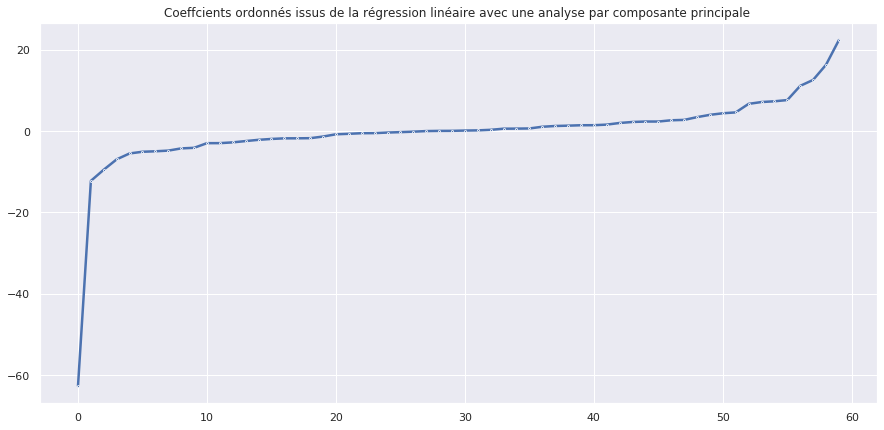

In [251]:
fig = plt.figure(figsize = (15, 7))
sns.lineplot(data=coefs_pca_ols, marker='o',markersize=2, linewidth=2.5)
plt.title("Coeffcients ordonnés issus de la régression linéaire avec une analyse par composante principale ")

# Q.6 : Comparaison des deux modèles précédents

In [269]:
print("La moyenne de y_train est environ égale à ", round(y_train.mean(),2))

La moyenne de y_train est environ égale à  153.74


In [263]:
intercept_mco:float = mco.intercept_ 
intercept_pca_ols:float= pca_ols.intercept_

diff_intercepts = intercept_pca_ols - intercept_mco
print("Différence entre les intercepts :", diff_intercepts)

Différence entre les intercepts : 0.75


On remarque que les 2 intercepts ne sont pas égaux ce qui n'est pas surpenant. </br>
En effet, les deux régressions linéaires linéaires ne sont pas effectuées sur les mêmes jeux de données </br>
On peut cependant observer que leurs valeurs respectives sont du même ordre et même proches. L'ACP semble donc être une méthode cohérente de sélection de variables pour le moment...

In [276]:
popo = pd.DataFrame(data=scale(Xtild, axis=0, with_mean=True, with_std=True))
popo.mean()

0     2.516086e-17
1     2.264478e-17
2    -7.548259e-18
3     3.145108e-19
4    -1.887065e-18
5     4.088640e-18
6     1.572554e-17
7     6.290215e-19
8     8.806302e-18
9    -5.346683e-18
10    3.491070e-17
11   -8.177280e-18
12   -1.195141e-17
13   -1.887065e-18
14   -3.522521e-17
15   -1.555354e-17
16   -7.862769e-18
17    2.830597e-18
18    4.145154e-17
19    8.806302e-18
20   -8.020025e-18
21   -5.032172e-17
22   -3.742678e-17
23    2.350968e-17
24    6.101509e-17
25    6.015019e-17
26    1.887065e-18
27    6.604726e-18
28    3.239461e-17
29    5.472487e-17
30    2.956401e-17
31    3.711227e-17
32   -2.830597e-18
33   -4.403151e-18
34   -3.899934e-17
35    2.862048e-17
36    1.884116e-17
37    3.145108e-19
38   -6.290215e-18
39    2.814871e-17
40    3.145108e-18
41   -7.862769e-17
42   -5.095075e-17
43   -4.182993e-17
44    3.050754e-17
45    2.107222e-17
46    4.151542e-17
47    3.302363e-18
48   -1.187278e-17
49    8.491791e-18
50   -4.403151e-18
51   -4.010012e-17
52   -1.0378

In [ ]:
residus_ALS = y_test - prediction_ALS

In [ ]:
sns.distplot(residus_ALS)
print("R² ALS : " + str(reg.score(Xtild2_test, y_test)))

In [ ]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=jojo, marker='o',markersize=2, linewidth=2.5)

In [ ]:
residus_sans_ALS = y_test - prediction_sans_ALS
print("R² OLS : " + str(reg2.score(X_test, y_test)))
sns.distplot(residus_sans_ALS)
